<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#-Homework-2-(Topics-5-7:-Groupby,-Merge,-Visualization)" data-toc-modified-id="-Homework-2-(Topics-5-7:-Groupby,-Merge,-Visualization)-1"><span class="toc-item-num">1&nbsp;&nbsp;</span><center> Homework 2 (Topics 5-7: Groupby, Merge, Visualization)</center></a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Task-0." data-toc-modified-id="Task-0.-1.0.0.1"><span class="toc-item-num">1.0.0.1&nbsp;&nbsp;</span>Task 0.</a></span></li><li><span><a href="#Task-1." data-toc-modified-id="Task-1.-1.0.0.2"><span class="toc-item-num">1.0.0.2&nbsp;&nbsp;</span>Task 1.</a></span></li><li><span><a href="#Task-2:" data-toc-modified-id="Task-2:-1.0.0.3"><span class="toc-item-num">1.0.0.3&nbsp;&nbsp;</span>Task 2:</a></span></li><li><span><a href="#Task-3:" data-toc-modified-id="Task-3:-1.0.0.4"><span class="toc-item-num">1.0.0.4&nbsp;&nbsp;</span>Task 3:</a></span></li><li><span><a href="#Task-4:" data-toc-modified-id="Task-4:-1.0.0.5"><span class="toc-item-num">1.0.0.5&nbsp;&nbsp;</span>Task 4:</a></span></li><li><span><a href="#Task-5:" data-toc-modified-id="Task-5:-1.0.0.6"><span class="toc-item-num">1.0.0.6&nbsp;&nbsp;</span>Task 5:</a></span></li><li><span><a href="#Вопросы:" data-toc-modified-id="Вопросы:-1.0.0.7"><span class="toc-item-num">1.0.0.7&nbsp;&nbsp;</span>Вопросы:</a></span></li><li><span><a href="#Task-6:" data-toc-modified-id="Task-6:-1.0.0.8"><span class="toc-item-num">1.0.0.8&nbsp;&nbsp;</span>Task 6:</a></span></li><li><span><a href="#Вопросы:" data-toc-modified-id="Вопросы:-1.0.0.9"><span class="toc-item-num">1.0.0.9&nbsp;&nbsp;</span>Вопросы:</a></span></li></ul></li></ul></li></ul></li></ul></div>

# <center> Homework 2 (Topics 5-7: Groupby, Merge, Visualization)

In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Ещё раз (как и в задании 1) считайте в переменные tr_mcc_codes, tr_types, transactions и customers_gender_train. В transactions опять считайте только первые 1000000 строк.

In [6]:
### Type your code here
transactions = pd.read_csv('transactions.csv', nrows=1000000, sep=',')
gender_train = pd.read_csv('gender_train.csv', sep=',')
tr_mcc_codes = pd.read_csv('tr_mcc_codes.csv', sep=';')
tr_types = pd.read_csv('tr_types.csv', sep=';')

# Проверка загруженных данных
print(transactions.head())
print(gender_train.head())
print(tr_mcc_codes.head())
print(tr_types.head())

   customer_id tr_datetime  mcc_code  tr_type    amount term_id
0     39026145  0 10:23:26      4814     1030  -2245.92     NaN
1     39026145  1 10:19:29      6011     7010  56147.89     NaN
2     39026145  1 10:20:56      4829     2330 -56147.89     NaN
3     39026145  1 10:39:54      5499     1010  -1392.47     NaN
4     39026145  2 15:33:42      5499     1010   -920.83     NaN
   customer_id  gender
0     10928546       1
1     69348468       1
2     61009479       0
3     74045822       0
4     27979606       1
   mcc_code                                    mcc_description
0       742                                Ветеринарные услуги
1      1711  Генеральные подрядчики по вентиляции, теплосна...
2      1731                        Подрядчики по электричеству
3      1799  Подрядчики, специализированная торговля — нигд...
4      2741           Разнообразные издательства/печатное дело
   tr_type                                     tr_description
0     3200  Плата за предоставление ус

#### Task 0.
Соедините transactions с всеми остальными таблицами (tr_mcc_codes, tr_types, gender_train). Причём с customers_gender_train необходимо смёрджиться с помощью left join, а с оставшимися датафреймами - через inner.
После получения результата таблицы gender_train, tr_types, tr_mcc_codes можно удалить. В результате соединения датафреймов должно получиться 999584 строки.

In [8]:
### Type your code here
transactions = transactions.merge(gender_train, on='customer_id', how='left')
transactions = transactions.merge(tr_types, on='tr_type', how='inner')
transactions = transactions.merge(tr_mcc_codes, on='mcc_code', how='inner')

del gender_train
del tr_types
del tr_mcc_codes

In [9]:
print(f'Количество строк после объединения: {transactions.shape[0]}')
print(transactions.head())

Количество строк после объединения: 999584
   customer_id tr_datetime  mcc_code  tr_type    amount term_id  gender  \
0     39026145  0 10:23:26      4814     1030  -2245.92     NaN     1.0   
1     39026145  1 10:19:29      6011     7010  56147.89     NaN     1.0   
2     39026145  1 10:20:56      4829     2330 -56147.89     NaN     1.0   
3     39026145  1 10:39:54      5499     1010  -1392.47     NaN     1.0   
4     39026145  2 15:33:42      5499     1010   -920.83     NaN     1.0   

                                      tr_description  \
0                     Оплата услуги. Банкоматы СБ РФ   
1       Взнос наличных через АТМ (в своем тер.банке)   
2  Списание с карты по операции “перевода с карты...   
3                              Покупка. POS ТУ СБ РФ   
4                              Покупка. POS ТУ СБ РФ   

                                     mcc_description  
0  Звонки с использованием телефонов, считывающих...  
1  Финансовые институты — снятие наличности автом...  
2   

#### Task 1.
1. Определите модуль разницы между средними тратами женщин и мужчин (трата - отрицательное значение amount). (*)

Выведите ответ в виде вещественного числа, округлённого до двух знаков после запятой, отделив дробную часть точкой в формате "123.45"

##### Пояснения:
(\*) Если в результате для мужчин получились значения [-1,-3,-5], а для женщин [-1,-2,-3],  
то модуль разницы между средними арифметическими -3 и -2 будет равен 1.

(\**) Обратите внимание, что для вычисления модуля разности точных знаний о том,  
какой класc относится к мужчинам, а какой - к женщинам, пока не требуется.

(\***) Округление не нужно производить отдельно по средним тратам женщин и мужчин, а только в самом конце, когда получите значение модуля разницы трат.

In [11]:
mean_expenses = transactions[transactions['amount'] < 0].groupby('gender')['amount'].mean()
print(mean_expenses)

mean_men = mean_expenses.get(1.0, 0)   # Мужчины
mean_women = mean_expenses.get(0.0, 0) # Женщины

difference = abs(mean_men - mean_women)
print(f"{difference:.2f}")

gender
0.0   -53376.917122
1.0   -86094.972042
Name: amount, dtype: float64
32718.05


#### Task 2:
1. Создайте новый столбец - mcc_code+tr_type, сконкатенировав значения из соответствующих столбцов. (\*)
2. Оставьте только наблюдения с отрицательным значением amount. Посчитайте дисперсию по категориям получившегося столбца mcc_code+tr_type, в которых количество наблюдений >= 10. 
3. Определите отношение максимальной дисперсии к минимальной.

Выведите ответ в виде вещественного числа, округлённого до ближайшего целого в формате "123456" без дробной части.

##### Пояснения:
(\*) Для конкатенации значений в столбцах можно использовать метод .astype(str) для серии и складывать соответствующие серии. Либо же применять apply к строкам датафрейма, прописывая логику преобразования и конкатенации значений внутри.

(\**) Для одновременного подсчета количества наблюдений и дисперсии по категориям можно воспользоваться функцией .agg()

In [13]:
#1
transactions['mcc_code_tr_type'] = transactions['mcc_code'].astype(str) + '_' + transactions['tr_type'].astype(str)

In [14]:
#2 отрицат
negative_expenses = transactions[transactions['amount'] < 0]

#2 дисперсия
variance_counts = negative_expenses.groupby('mcc_code_tr_type')['amount'].agg(['count', 'var'])
#2 >= 10
filtered_variance = variance_counts[variance_counts['count'] >= 10]
print(filtered_variance)

                  count           var
mcc_code_tr_type                     
1711_1110            18  4.029687e+10
1799_1110            57  1.804924e+10
3000_1010           482  2.762345e+11
3000_1100            92  8.796329e+10
3000_1110            12  4.452301e+10
...                 ...           ...
8999_1200            91  5.151221e+10
9222_1100            33  6.592241e+09
9311_1100            37  2.580298e+09
9399_1100           157  5.239317e+10
9399_1200            18  1.843060e+10

[408 rows x 2 columns]


In [15]:
#3 минмакс
max_variance = filtered_variance['var'].max()
min_variance = filtered_variance['var'].min()
ratio = max_variance / min_variance if min_variance != 0 else None

result = round(ratio) if ratio is not None else None

if result is not None:
    print(result)
else:
    print("Деление на ноль или недостаточно данных для анализа.")

9170599


#### Task 3:
1. По всем типам транзакций рассчитайте максимальную сумму прихода на карту (из строго положительных сумм по столбцу amount) отдельно для мужчин и женщин (назовите ее "max_income"). Оставьте по 5 транзакций для мужчин и для женщин, наименьших среди всех транзакций по полученным значениям "max_income". (\*)
2. Выделите среди них те, которые встречаются одновременно и у мужчин, и у женщин:
    - 1) Покупка. POS ТУ СБ РФ	
    - 2) Списание после проведения претензионной работы	
    - 3) Плата за получение наличных. Россия	
    - 4) Перевод на карту/ с карты через АТМ (со взиманием комиссии с отправителя) по счету в овердрафте	
    - 5) Плата за получение наличных в АТМ. Россия	VVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVV 
    - 6) Наличные. Зарубеж. банк	
    - 7) Возврат покупки. POS ТУ Россия

##### Пояснения:
(\*) Если максимальные суммы приходов по каким-то типам были равны [1,2,3,4,5,6,7,8], то 5 минимальных из них: [1,2,3,4,5]

In [17]:
### Type your code here
pos_expenses = transactions[transactions['amount'] > 0]

max_income = pos_expenses.groupby(['tr_description', 'gender'])['amount'].max().reset_index()
print(max_income)

                                       tr_description  gender       amount
0                            Взнос наличных через POS     0.0  22459157.72
1                            Взнос наличных через POS     1.0  21336199.83
2   Взнос наличных через POS (в своем ТБ) по счету...     0.0    449183.15
3   Взнос наличных через POS (в своем ТБ) по счету...     1.0   9657437.82
4                            Взнос наличных через АТМ     0.0   4604127.33
..                                                ...     ...          ...
65                                Покупка. ТУ  Россия     1.0    163727.26
66     Списание после проведения претензионной работы     1.0     64682.37
67  Списание с карты на карту по операции <перевод...     0.0      2335.75
68  Списание с карты на карту по операции <перевод...     1.0    113194.15
69  Списание с карты по операции “перевода с карты...     0.0    112295.79

[70 rows x 3 columns]


In [18]:
min_income_men = max_income[max_income['gender'] == 1.0].nsmallest(5, 'amount')
print(min_income_men)

                                    tr_description  gender    amount
26             Выдача наличных через POS Сбербанка     1.0   2245.92
54       Плата за получение наличных в АТМ. Россия     1.0   2245.92
61                           Покупка. POS ТУ СБ РФ     1.0  28803.87
66  Списание после проведения претензионной работы     1.0  64682.37
19                      Возврат  покупки. ТУ СБ РФ     1.0  79280.83


In [19]:
min_income_women = max_income[max_income['gender'] == 0.0].nsmallest(5, 'amount')
print(min_income_women)

                                       tr_description  gender   amount
51  Плата за перевод на карту (с карты) через АТМ ...     0.0  1122.96
52        Плата за получение наличных в АТМ. Зарубеж.     0.0  2245.92
53          Плата за получение наличных в АТМ. Россия     0.0  2245.92
67  Списание с карты на карту по операции <перевод...     0.0  2335.75
55                Плата за получение наличных. Россия     0.0  5041.86


In [20]:
common_income = pd.merge(min_income_men, min_income_women, on='tr_description')
print(common_income)

                              tr_description  gender_x  amount_x  gender_y  \
0  Плата за получение наличных в АТМ. Россия       1.0   2245.92       0.0   

   amount_y  
0   2245.92  


#### Task 4:
1. Выделите из поля tr_datetime относительный день tr_day (первое число до точного времени). (\*)
2. Отфильтруйте строки таким образом, чтобы оставить только те транзакции, у которых в соответствующий относительный день tr_day количество уникальных MCC кодов при транзакциях было больше 75 (можно воспользоваться функцией nunique())
3. Сгруппируйте полученный отфильтрованный датафрейм по MCC коду и полу, после чего, пронализировав результат, выберите верные варианты ответов ниже (\**): 
    VVV 1) gender == 0 - женщины, gender == 1 - мужчины VVVVVVVVVVVVVVv
    --- 2) gender == 1 - женщины, gender == 0 - мужчины XXXXXXXXXXXXXX
    VVV 3) Абсолютное значение медианы с типом "Флористика" (расходов/приходов) у мужчин выше той же медианы у женщин VVVVVVVVVVV
    --- 4) Абсолютное значение медианы женских трат (расходов/приходов) на ценные бумаги выше мужских XXXXXXXXXXXXXXX
    VVV 5) Абсолютное значение медианы женских трат (расходов/приходов) в категории "Бары, коктейль-бары, дискотеки, ночные клубы и таверны — места продажи алкогольных напитков" ниже мужских VVVVVVVVVVVVVVV
    
##### Пояснения:
(\*) Для того, чтобы выделить всё, что стоит до первого пробела, можо использовать строковые методы для датафрейма - .str.split(), например. Либо же реализовывать логику выделения подстроки с помощью метода apply. <br>
(\**) Понять, какой класс к какому типу транзакций (мужские/женские) относится можно, если поизучать типичные для мужчин/женщин категории и сравнить средние/медианы расходов и/или приходов в них.

In [22]:
transactions['tr_day'] = transactions['tr_datetime'].str.split().str[0].astype(int)
print(transactions)

        customer_id   tr_datetime  mcc_code  tr_type    amount   term_id  \
0          39026145    0 10:23:26      4814     1030  -2245.92       NaN   
1          39026145    1 10:19:29      6011     7010  56147.89       NaN   
2          39026145    1 10:20:56      4829     2330 -56147.89       NaN   
3          39026145    1 10:39:54      5499     1010  -1392.47       NaN   
4          39026145    2 15:33:42      5499     1010   -920.83       NaN   
...             ...           ...       ...      ...       ...       ...   
999579     98801178  269 10:29:06      5921     1010 -23016.59    127873   
999580     98801178  270 10:26:45      5211     1010 -61380.88  10114209   
999581     98801178  270 15:18:53      5921     1010 -11800.27  10105341   
999582     98801178  271 12:47:13      5211     1010 -16170.59  10114209   
999583     98801178  271 14:51:56      5921     1010 -10025.77    123991   

        gender                                     tr_description  \
0          1.0    

In [23]:
filtered_data = transactions.groupby('tr_day').filter(lambda x: x['mcc_code'].nunique() > 75)

In [24]:
grouped = filtered_data.groupby(['mcc_description', 'gender'])['amount'].agg(['median', 'count']).reset_index()
print(grouped)

                                       mcc_description  gender     median  \
0                              Авиалинии, авиакомпании     0.0 -269822.97   
1                              Авиалинии, авиакомпании     1.0 -232407.36   
2    Авиалинии, авиакомпании, нигде более не класси...     0.0 -128129.49   
3    Авиалинии, авиакомпании, нигде более не класси...     1.0 -194629.26   
4                                     Автобусные линии     0.0  -31038.56   
..                                                 ...     ...        ...   
337                                             Штрафы     0.0  -11903.35   
338                                             Штрафы     1.0  -11678.76   
339  Штучные товары, галантерея и другие текстильны...     0.0   -7186.93   
340                 Электрические части и оборудование     0.0  -93963.50   
341                 Электрические части и оборудование     1.0  -16414.61   

     count  
0      123  
1      173  
2      127  
3      135  
4        7

In [25]:
print(grouped[grouped['mcc_description'] == 'Ценные бумаги: брокеры/дилеры'])
print(grouped[grouped['mcc_description'] == 'Табачные магазины'])
print(grouped[grouped['mcc_description'] == 'Магазины косметики'])
print(grouped[grouped['mcc_description'] == 'Магазины ткани, ниток рукоделия, шитья'])

                   mcc_description  gender    median  count
329  Ценные бумаги: брокеры/дилеры     0.0  -6737.75      3
330  Ценные бумаги: брокеры/дилеры     1.0 -11229.58    123
       mcc_description  gender    median  count
278  Табачные магазины     0.0 -3121.820     13
279  Табачные магазины     1.0 -6108.895      6
        mcc_description  gender    median  count
127  Магазины косметики     0.0 -14766.90   1280
128  Магазины косметики     1.0 -19494.55    507
                            mcc_description  gender     median  count
141  Магазины ткани, ниток рукоделия, шитья     0.0  -7344.145     62
142  Магазины ткани, ниток рукоделия, шитья     1.0 -15698.950     17


In [26]:
print(grouped[grouped['mcc_description'] == 'Флористика'])

    mcc_description  gender    median  count
319      Флористика     0.0 -13890.99    175
320      Флористика     1.0 -18865.69    192


In [27]:
print(grouped[grouped['mcc_description'] == 'Бары, коктейль-бары, дискотеки, ночные клубы и таверны — места продажи алкогольных напитков'])

                                      mcc_description  gender    median  count
26  Бары, коктейль-бары, дискотеки, ночные клубы и...     0.0  -9387.93     90
27  Бары, коктейль-бары, дискотеки, ночные клубы и...     1.0 -13475.49    217


#### Task 5:
1. Разбейте расходы (отрицательные значения сумм) на 5 бакетов amount_bucket равного объёма (с помощью pd.qcut), разбив все траты на категории 'Very High', 'High', 'Middle', 'Low', 'Very Low'. (\*)
2. Оставшиеся неотрицательные траты отнесите к категории 'Income'.
(воспользуйтесь функцией .cat.add_categories('Income') для того, чтобы добавить новую категорию 'Income' к категориям 'Very High', 'High', 'Middle', 'Low', 'Very Low', а затем заполните пустые значения новой категорией).
3. Из поля tr_datetime выделите час tr_hour, в который произошла транзакция, как первые 2 цифры до ":". (\**)
3. После этого постройте сводную таблицу, значениями в которой является пол gender, индексы - tr_hour, столбцы - amount_bucket.
4. Отрисуйте полученные результаты, передав их в функцию plot_pivot_table, расположенную ниже.
5. Выберите верные ответы на вопросы ниже.

#### Вопросы:
    VVV 1) Ночные поступления денег (01-05 часов) в более чем 85% случаев являются мужскими.  ДА
    --- 2) Посмотрев на долю мужчин в поступлениях средств (Income), можно сделать вывод, что количество поступлений средств женщинам в целом больше, чем мужчинам. НЕТ
    VVV 3) Самые низкие траты в 3 часа ночи осуществляются в более 70% случаев женщинами. ДА
    --- 4) Существуют особые часы в мелких тратах, когда женщины тратят намного больше мужчин (>80%) НЕТ, только >70%
    VVV 5) Посмотрев на долю мужчин в максимальных тратах средств (Very High), можно сделать вывод, что количество высоких трат в каждый возможный час мужчин больше, чем у женщин. ДА

##### Пояснения:
(\*) Обратите внимание, что в категории Very High Должны оказаться максимальные по модулю отрицательные транзакции. <br>
(\**) Например, для строки "0 10:23:26" час будет равен 10, а для строки "6 07:08:31"- 07. Можно воспользоваться функциями str.split() или str.find() и 
функцией .apply(lambda x: x[])

In [29]:
#1
transactions['amount_bucket'] = pd.qcut(transactions[transactions['amount'] < 0]['amount'], 
                                        q=5, 
                                        labels=['Very High', 'High', 'Middle', 'Low', 'Very Low'])

In [30]:
#2
transactions['amount_bucket'] = transactions['amount_bucket'].cat.add_categories('Income')
transactions.loc[transactions['amount'] >= 0, 'amount_bucket'] = 'Income'

In [71]:
#3
transactions['tr_hour'] = transactions['tr_datetime'].str.split().str[1].str.split(':').str[0].astype(int)

In [103]:
#3
pivot_table = transactions.pivot_table(index='tr_hour', 
                                       columns='amount_bucket', 
                                       values='gender', 
                                       aggfunc=lambda x: x.value_counts(normalize=True).get(1, 0), 
                                       fill_value=0)

C:\Users\Andrey\AppData\Local\Temp\ipykernel_3776\1030939377.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = transactions.pivot_table(index='tr_hour',


In [109]:
def plot_pivot_table(pivot_table):
    plt.figure(figsize=(9, 11))
    sns.heatmap(pivot_table, cmap="YlGnBu", annot=True, 
                fmt='.3g', annot_kws={"fontsize": 14})
    plt.xticks(fontsize=15)
    plt.yticks(rotation=0, fontsize=15)
    plt.xlabel('Bucket', size=18)
    plt.ylabel('Hour', fontsize=18)
    plt.title('Gender analysis per bucket and hour', fontsize=20)
    plt.show()

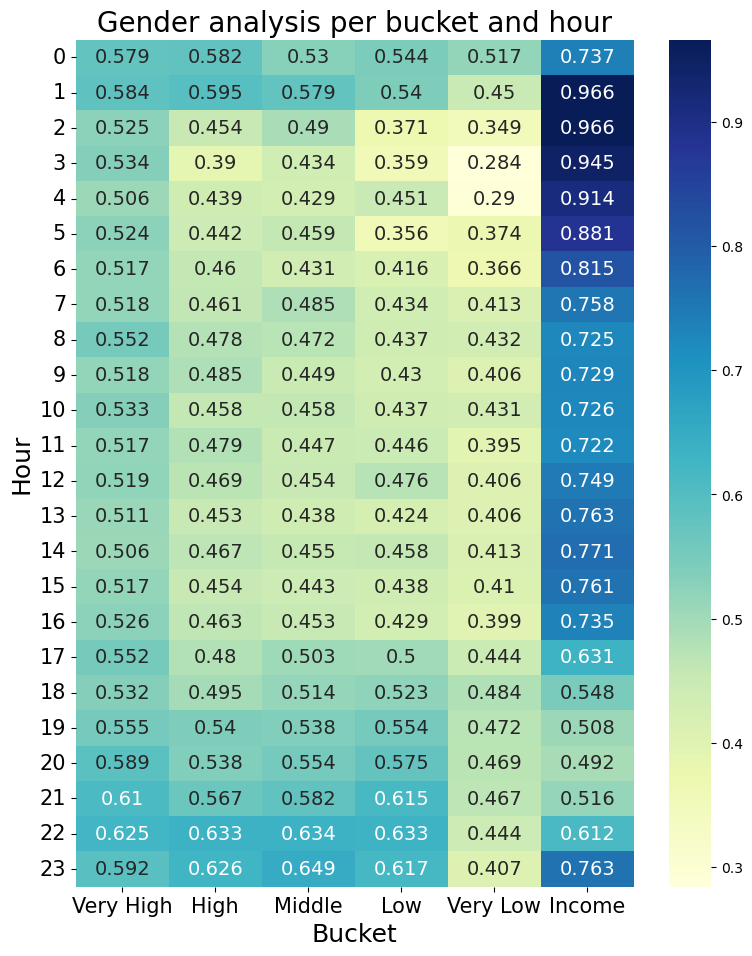

In [111]:
#4 Type your code here
plot_pivot_table(pivot_table)

#### Task 6:
1. Измените тип поля tr_day на int.
2. Выберите из transactions все MCC коды, которые встретились в выборке более чем 60000 раз.
3. Сгруппируйте отфильтрованный датафрейм по дню и MCC-коду, получая средние значения суммы amount.  
4. Далее отрисуйте зависимость средних сумм (может пригодится метод unstack()) по каждому из MCC-кодов по дням.
5. Выберите верные ответы на вопросы ниже.

#### Вопросы:
    VVV 1) 2 из полученных MCC-кодов связаны с финансовыми институтами
    VVV 2) 2 MCC кода, связанные со снятием наличности имеют в целом разные знаки (в одном случае почти везде - траты, в другом - пополнения)
    --- 3) Бакалейные магазины обладают максимальными средними тратами среди выбранных MCC-кодов
    VVV 4) Денежные переводы имеют как минимум 3 явных минимума средних
    --- 5) Категория "Звонки с использованием телефонов, считывающих магнитную ленту" имеет визуально очень большую дисперсию. 

In [118]:
#1
transactions['tr_day'] = transactions['tr_day'].astype(int)

In [122]:
#2
mcc_counts = transactions['mcc_description'].value_counts()
popular_mcc_codes = mcc_counts[mcc_counts > 60000].index
print(popular_mcc_codes)

Index(['Финансовые институты — снятие наличности автоматически',
       'Финансовые институты — снятие наличности вручную',
       'Бакалейные магазины, супермаркеты',
       'Звонки с использованием телефонов, считывающих магнитную ленту',
       'Денежные переводы'],
      dtype='object', name='mcc_description')


In [124]:
#3
filtered_transactions = transactions[transactions['mcc_description'].isin(popular_mcc_codes)]
grouped_mean = filtered_transactions.groupby(['tr_day', 'mcc_description'])['amount'].mean()
print(grouped_mean)

tr_day  mcc_description                                               
0       Бакалейные магазины, супермаркеты                                 -15462.567344
        Денежные переводы                                                -214754.866266
        Звонки с использованием телефонов, считывающих магнитную ленту     -5631.316489
        Финансовые институты — снятие наличности автоматически            -55388.115175
        Финансовые институты — снятие наличности вручную                   90390.672987
                                                                              ...      
456     Бакалейные магазины, супермаркеты                                 -15411.548528
        Денежные переводы                                                -274049.766409
        Звонки с использованием телефонов, считывающих магнитную ленту     -5945.182500
        Финансовые институты — снятие наличности автоматически             18406.478780
        Финансовые институты — снятие наличности 

<Figure size 1200x800 with 0 Axes>

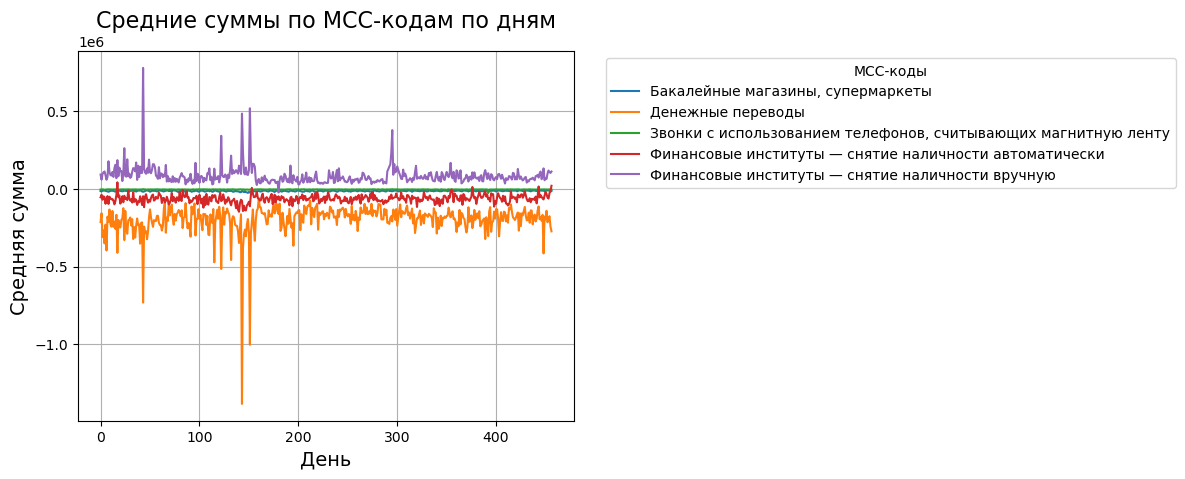

mcc_description  Бакалейные магазины, супермаркеты  Денежные переводы  \
tr_day                                                                  
0                                    -15462.567344     -214754.866266   
1                                    -17770.243543     -158317.573750   
2                                    -13197.019449     -311439.224857   
3                                    -12584.078209     -267813.727273   
4                                    -12376.649916     -351382.308480   
...                                            ...                ...   
452                                  -11805.167583     -215973.976904   
453                                  -11932.826972     -190370.376239   
454                                  -13345.274312     -177081.530909   
455                                  -12953.262927     -243267.887869   
456                                  -15411.548528     -274049.766409   

mcc_description  Звонки с использованием телефонов

In [126]:
#4
mean_df = grouped_mean.unstack()

plt.figure(figsize=(12, 8))
mean_df.plot()
plt.title('Средние суммы по MCC-кодам по дням', fontsize=16)
plt.xlabel('День', fontsize=14)
plt.ylabel('Средняя сумма', fontsize=14)
plt.legend(title='MCC-коды', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.show()

# Примерный вывод сводной таблицы для анализа
print(mean_df)